In [1]:
import jax
from BFGS import bfgs
import jax.numpy as jnp 
import matplotlib.pyplot as plt
jax.config.update("jax_enable_x64", True)
plt.rcdefaults() # restore default settings
plt.rcParams.update({
    "text.usetex": True,
    # "font.family": "Helvetica",
    "font.size": plt.rcParams["font.size"] * 1.5,
    # "font.family":'serif',
# "font.serif" : 'Computer Modern Roman',
    "lines.linewidth": 3,

})
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rc('text.latex', preamble=r'\usepackage{bm}')
print(jax.devices())

[CpuDevice(id=0)]


In [13]:
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

In [15]:
xopt, xs = bfgs(rosenbrock, jnp.array([-1.2, 1.0]), tol=1e-6)

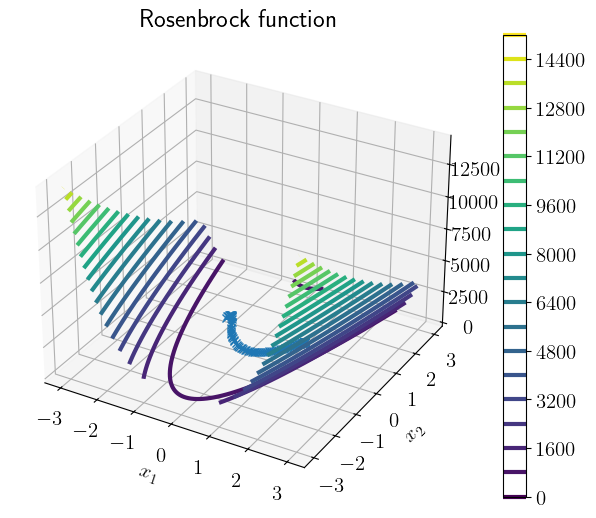

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
fig.set_size_inches((8, 6))
x = jnp.linspace(-3, 3, 100)
x1, x2 = jnp.meshgrid(x, x)
cf = ax.plot(x1,x2,rosenbrock((x1,x2)), levels=20, cmap='viridis')
ax.plot(xs[:,0], xs[:,1], 'x-', lw=2)
ax.clabel(cf, fontsize=12)
fig.colorbar(cf)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(r'Rosenbrock function')
# plt.xlim(-2, 2)
# plt.ylim(-1, 3)
# plt.grid()
# plt.savefig('rosenbrock.png', dpi=300, bbox_inches='tight')
plt.show()